# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 2 Part A:
We should load dataset ($\texttt{dataset\_1.csv}$ file) as a train dataset

### Import libraries

In [40]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch.optim as optim

### Check GPU availability

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Read dataset and data visualization

In [43]:
df = pd.read_csv("../inputs/dataset_1.csv")

# shuffling dataset
df = shuffle(df)

# split dataset into the inputs x and the outputs y (labels)
X = df[['x', 'y']]
y = df['label']

print("shape of data frame is:", df.shape)
df

shape of data frame is: (100000, 3)


,x,y,label
37275,-64.55934,84.05008,0.0
15458,-29.37858,-71.22122,0.0
34280,80.86796,49.59819,0.0
65147,46.90594,8.26315,0.0
81189,-87.23918,-28.38260,1.0
...,...,...,...
19058,-33.18686,26.51072,1.0
71323,39.88017,64.31501,1.0
84700,61.22537,-60.09444,0.0
20293,-9.51765,80.46464,1.0


### Convert data to pytorch tensors

In [44]:
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device).view(-1, 1)

print("Training set size:", len(X_tensor))
X_tensor

Training set size: 100000


tensor([[-64.5593,  84.0501],
        [-29.3786, -71.2212],
        [ 80.8680,  49.5982],
        ...,
        [ 61.2254, -60.0944],
        [ -9.5176,  80.4646],
        [ 69.5637,   2.8899]], device='cuda:0')

### Split classes

In [64]:
class0 = torch.cat((X_tensor[y_tensor.flatten() == 0], y_tensor[y_tensor.flatten() == 0]), dim=1)
class1 = torch.cat((X_tensor[y_tensor.flatten() == 1], y_tensor[y_tensor.flatten() == 1]), dim=1)

### Plot dataset

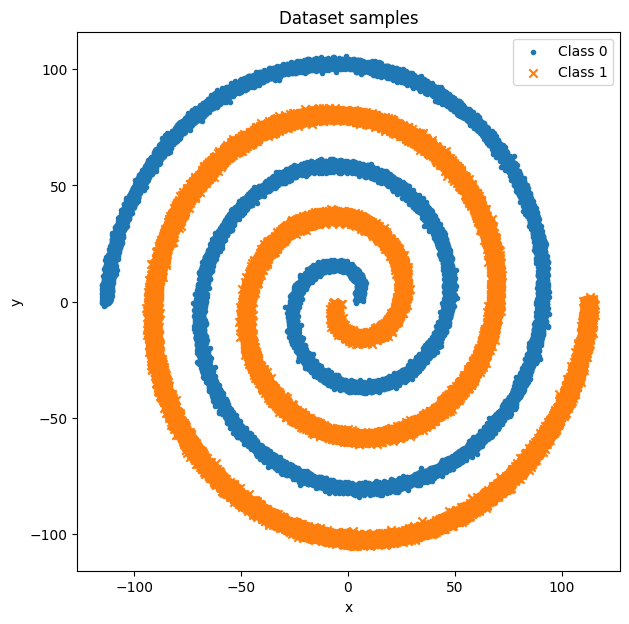

In [65]:
plt.figure(figsize=(7, 7))

plt.scatter(class0[:, 0].cpu().numpy(), class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(class1[:, 0].cpu().numpy(), class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset samples")
plt.legend()

plt.show()

### Split dataset into the 50 subsets

In [66]:
# Determine the number of samples per subset
num_subsets = 50
num_samples_per_class = min(len(class0), len(class1)) // num_subsets

subsets = []
for _ in range(num_subsets):
    indices_class0 = torch.randperm(len(class0))[:num_samples_per_class]
    indices_class1 = torch.randperm(len(class1))[:num_samples_per_class]
    
    subset_class0 = class0[indices_class0]
    subset_class1 = class1[indices_class1]
    
    subset = torch.cat((subset_class0, subset_class1), dim=0)
    subsets.append(subset)

for i, subset in enumerate(subsets):
    print(f"subset {i+1}: {subset.shape}")

subset 1: torch.Size([2000, 3])
subset 2: torch.Size([2000, 3])
subset 3: torch.Size([2000, 3])
subset 4: torch.Size([2000, 3])
subset 5: torch.Size([2000, 3])
subset 6: torch.Size([2000, 3])
subset 7: torch.Size([2000, 3])
subset 8: torch.Size([2000, 3])
subset 9: torch.Size([2000, 3])
subset 10: torch.Size([2000, 3])
subset 11: torch.Size([2000, 3])
subset 12: torch.Size([2000, 3])
subset 13: torch.Size([2000, 3])
subset 14: torch.Size([2000, 3])
subset 15: torch.Size([2000, 3])
subset 16: torch.Size([2000, 3])
subset 17: torch.Size([2000, 3])
subset 18: torch.Size([2000, 3])
subset 19: torch.Size([2000, 3])
subset 20: torch.Size([2000, 3])
subset 21: torch.Size([2000, 3])
subset 22: torch.Size([2000, 3])
subset 23: torch.Size([2000, 3])
subset 24: torch.Size([2000, 3])
subset 25: torch.Size([2000, 3])
subset 26: torch.Size([2000, 3])
subset 27: torch.Size([2000, 3])
subset 28: torch.Size([2000, 3])
subset 29: torch.Size([2000, 3])
subset 30: torch.Size([2000, 3])
subset 31: torch.Si

In [67]:
for i, loader in enumerate(subsets):
    print(f"Subset {i+1}:")
    print(loader)
    print('-' * 50)

Subset 1:
tensor([[ 85.4059,  38.3986,   0.0000],
        [ 76.6078,  54.0083,   0.0000],
        [-41.3230,  95.3533,   0.0000],
        ...,
        [112.5826,  -5.4063,   1.0000],
        [-87.8749, -33.8512,   1.0000],
        [ 69.0999,  20.3452,   1.0000]], device='cuda:0')
--------------------------------------------------
Subset 2:
tensor([[ 43.2998, -13.0430,   0.0000],
        [-66.0692, -16.3810,   0.0000],
        [-17.7085, -26.2621,   0.0000],
        ...,
        [ 56.2655, -34.9415,   1.0000],
        [-48.2060,  -8.1400,   1.0000],
        [ 39.1433, -49.3126,   1.0000]], device='cuda:0')
--------------------------------------------------
Subset 3:
tensor([[ 31.3018, -78.0072,   0.0000],
        [ -0.2843, -79.8989,   0.0000],
        [ 40.5676,  89.8924,   0.0000],
        ...,
        [-52.1509,  65.4694,   1.0000],
        [ 21.5745, -99.0854,   1.0000],
        [-32.3983, -92.8251,   1.0000]], device='cuda:0')
--------------------------------------------------
Subs

### Design MLP network

In [69]:
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, output_size)
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# # Define the MLP network
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, output_size)
#         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x




class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [72]:
num_networks = 5

# Create 50 instances of the network with different initializations
networks = [MLP().to(device) for _ in range(num_networks)]

# Display the structure of the first network for verification
networks

[MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_feature

### Define the GRU-based RNN (G)

In [71]:
class GRUOptimizer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUOptimizer, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        out, hidden = self.gru(x, hidden)
        out = self.fc(out[:, -1, :])
        return out, hidden

### Initialize the GRU optimizer network

In [73]:
input_size = 1
hidden_size = 128
output_size = 1
gru_optimizer = GRUOptimizer(input_size, hidden_size, output_size).to(device)

# Optimizer for the GRU optimizer network
optimizer_gru = optim.Adam(gru_optimizer.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [78]:
# Training loop for the GRU-based RNN
for subset in subsets:
    # Split the subset into training and testing sets (2:8 ratio)
    subset = subset.cpu().numpy()
    train_size = int(0.2 * len(subset))
    train_data, test_data = train_test_split(subset, train_size=train_size, random_state=42)
    
    train_data = torch.tensor(train_data, dtype=torch.float32).to(device)
    test_data = torch.tensor(test_data, dtype=torch.float32).to(device)
    
    train_X, train_y = train_data[:, :2], train_data[:, 2].view(-1, 1)
    test_X, test_y = test_data[:, :2], test_data[:, 2].view(-1, 1)
    
    for _ in range(10):  # Outer loop
        # Initialize a new MLP network (f) for each iteration of the outer loop
        f = MLP().to(device)
        optimizer_f = optim.SGD(f.parameters(), lr=0.01)
        
        hidden = None
        for epoch in range(5):  # Inner loop
            optimizer_f.zero_grad()
            
            # Forward pass
            outputs = f(train_X)
            loss = criterion(outputs, train_y)
            
            # Backward pass
            loss.backward()
            
            # Get the gradients and prepare them for the GRU
            gradients = []
            for param in f.parameters():
                gradients.append(param.grad.view(-1))
            gradients = torch.cat(gradients).view(1, -1, 1).to(device)
            
            # Update the parameters using the GRU optimizer
            updates, hidden = gru_optimizer(gradients, hidden)
            updates = updates.view(-1)
            
            # Apply the updates to the parameters
            with torch.no_grad():
                for param, update in zip(f.parameters(), updates):
                    param -= 0.01 * update  # Learning rate could be adjusted
            
            # Zero the gradients after updating
            for param in f.parameters():
                param.grad = None
        
        # Evaluate the network on the test data
        f.eval()
        with torch.no_grad():
            outputs = f(test_X)
            test_loss = criterion(outputs, test_y)
            print(f"Test Loss: {test_loss.item()}")
